In [ ]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.9 MB/s eta 0:00:00


In [ ]:
pip install pynrrd

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 73.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import glob
import pydicom
import nrrd
import cv2
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from rasterio import features
import numpy as np
from PIL import Image
from skimage import draw
import random
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Rectum project/'


Mounted at /content/drive


In [ ]:
data_ad = glob.glob(path+'/Data/*')
data_ad

['/content/drive/MyDrive/Rectum project//Data/1139856_20210624_091001_0000',
 '/content/drive/MyDrive/Rectum project//Data/001854520_20210830_111214_0000',
 '/content/drive/MyDrive/Rectum project//Data/001234046_20200310_110846_0000',
 '/content/drive/MyDrive/Rectum project//Data/1139856_20210624_090912_0000',
 '/content/drive/MyDrive/Rectum project//Data/001854520_20210830_111148_0000',
 '/content/drive/MyDrive/Rectum project//Data/1139856_20210624_090853_0000',
 '/content/drive/MyDrive/Rectum project//Data/001854520_20210830_111137_0000',
 '/content/drive/MyDrive/Rectum project//Data/001234046_20200310_110820_0000',
 '/content/drive/MyDrive/Rectum project//Data/001412915_20210709_122919_0000',
 '/content/drive/MyDrive/Rectum project//Data/001412915_20210709_122910_0000',
 '/content/drive/MyDrive/Rectum project//Data/000589886_20190627_121726_0000',
 '/content/drive/MyDrive/Rectum project//Data/000589886_20190627_121711_0000',
 '/content/drive/MyDrive/Rectum project//Data/002395580_20

In [ ]:
for i in data_ad:
  A =pydicom.dcmread(path+'Data/' +i.split('/')[-1]+'/'+ i.split('/')[-1] + '.dcm')
  for j in tqdm(range(A.pixel_array.shape[0])):
    frame = A.pixel_array[j,:]
    #frame = frame[0:765,60:825,:]
    im = Image.fromarray(frame)
    im.save(path+'Sample_Frame/' +i.split('/')[-1]+'_'+str(j)+'.jpeg')

In [ ]:
i = data_ad[8]
B, header =nrrd.read(path +'Data/'+i.split('/')[-1]+'/'+ i.split('/')[-1] + '_PRED.seg.nrrd')
frame = B[:,:,100]

frame = np.transpose(frame)
Frame = frame.copy()
F = np.zeros((frame.shape))
T = np.ones((frame.shape))*255
#frame_n = np.where(frame !=3 , 0, frame)
frame_n = np.where(frame <3 ,0 , frame)*(255/3)
#frame_n1 = np.where(frame <3 , 0, frame_n)


In [ ]:
path +i.split('/')[-1]+'/'+ i.split('/')[-1]

'/content/drive/MyDrive/Rectum project/001412915_20210709_122919_0000/001412915_20210709_122919_0000'

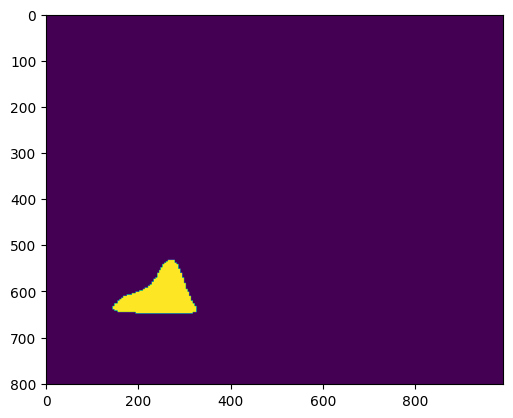

In [ ]:
plt.imshow(frame_n)

In [ ]:
frame_n.max()

255.0

In [ ]:
frame.shape

(802, 992)

In [ ]:
frame_n = np.array(frame_n,dtype='uint8')

In [ ]:
np.where(frame ==3)

(array([533, 533, 533, ..., 648, 648, 648]),
 array([264, 265, 266, ..., 315, 316, 317]))

In [ ]:
cords = list(features.shapes(frame_n, mask=(frame_n >0)))[0][0]['coordinates'][0]
       # numpy_array=np.asarray(cords)
label_line = '0 ' + ' '.join([f'{int(cord[0])/frame.shape[1]} {int(cord[1])/frame.shape[0]}' for cord in cords])
label_line

'0 0.40625 0.3167082294264339 0.4344758064516129 0.3167082294264339 0.4344758064516129 0.3204488778054863 0.4576612903225806 0.3204488778054863 0.4576612903225806 0.3254364089775561 0.4727822580645161 0.3254364089775561 0.4727822580645161 0.32917705735660846 0.4848790322580645 0.32917705735660846 0.4848790322580645 0.3329177057356609 0.49294354838709675 0.3329177057356609 0.49294354838709675 0.33665835411471323 0.4969758064516129 0.33665835411471323 0.4969758064516129 0.3403990024937656 0.5040322580645161 0.3403990024937656 0.5040322580645161 0.34413965087281795 0.5120967741935484 0.34413965087281795 0.5120967741935484 0.3478802992518703 0.5201612903225806 0.3478802992518703 0.5201612903225806 0.3516209476309227 0.5241935483870968 0.3516209476309227 0.5241935483870968 0.3566084788029925 0.53125 0.3566084788029925 0.53125 0.36034912718204487 0.5352822580645161 0.36034912718204487 0.5352822580645161 0.3640897755610973 0.5393145161290323 0.3640897755610973 0.5393145161290323 0.36783042394

In [ ]:
cords = list(features.shapes(frame, mask=(frame >0)))[0][0]['coordinates'][0]
       # numpy_array=np.asarray(cords)
        label_line = '0 ' + ' '.join([f'{int(cord[0])/frame.shape[1]} {int(cord[1])/frame.shape[0]}' for cord in cords])

In [ ]:
im = Image.fromarray(frame)
im.save(path+'Sample_Frame/' +i.split('/')[-1]+'_'+str(0)+'.jpeg')

#cv2.imwrite(path+'Sample_Frame/' +i.split('/')[-1]+'_'+str(0), frame)


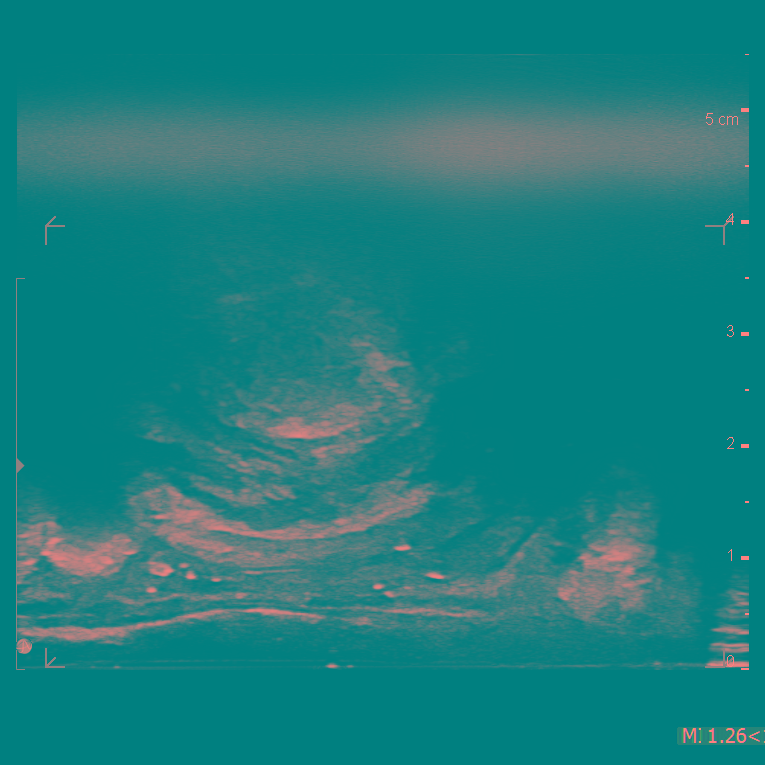

In [ ]:
im

In [ ]:
frame.shape

(802, 992, 3)

In [ ]:
m=0
for i in data_ad:
  A =pydicom.dcmread(path+'Data/' +i.split('/')[-1]+'/'+ i.split('/')[-1] + '.dcm')
  for j in tqdm(range(A.pixel_array.shape[0])):
    frame = A.pixel_array[j,:]
    #frame = frame[0:765,60:825,:]
    im = Image.fromarray(frame)
    if(m<7):
      im.save(path+'Yolo_Data_CDS/train/images/' +i.split('/')[-1]+'_'+str(j)+'.png')
    if(m>=7)and(m!=9):
      im.save(path+'Yolo_Data_CDS/val/images/' +i.split('/')[-1]+'_'+str(j)+'.png')
    if(m==9):
      im.save(path+'Yolo_Data_CDS/test/images/' +i.split('/')[-1]+'_'+str(j)+'.png')
  m=m+1

100%|██████████| 110/110 [00:18<00:00,  5.82it/s]


In [ ]:
m=0
for i in data_ad:
  B, header =nrrd.read(path+'Data/'+i.split('/')[-1]+'/'+ i.split('/')[-1] + '_PRED.seg.nrrd')
  for j in tqdm(range(B.shape[2])):
    frame = B[:,:,j]
    frame = np.transpose(frame)
    if 3 in frame:
      frame_n = (np.where(frame <3 , 0, frame)*(255/3)).astype('uint8')
      cords = list(features.shapes(frame_n, mask=(frame_n ==255)))[0][0]['coordinates'][0]
       # numpy_array=np.asarray(cords)
      label_line = '0 ' + ' '.join([f'{int(cord[0])/frame.shape[1]} {int(cord[1])/frame.shape[0]}' for cord in cords])
      if(m<7):
        label_path = open(path+'Yolo_Data_CDS/train/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write(label_line)
      if(m>=7)and(m!=9):
        label_path =  open(path+'Yolo_Data_CDS/val/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write(label_line)
      if(m==9):
        label_path = open(path+'Yolo_Data_CDS/test/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write(label_line)
    else:
      if(m<7):
        label_path = open(path+'Yolo_Data_CDS/train/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write("")
      if(m>=7)and(m!=9):
        label_path =  open(path+'Yolo_Data_CDS/val/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write("")
      if(m==9):
        label_path = open(path+'Yolo_Data_CDS/test/labels/' +i.split('/')[-1]+'_'+str(j)+'.txt',"w")
        label_path.write("")
  m=m+1

100%|██████████| 110/110 [00:49<00:00,  2.21it/s]


In [ ]:
yaml_content_cds = f'''
train: /content/drive/MyDrive/Rectum project/Yolo_Data_CDS/train/images
val: /content/drive/MyDrive/Rectum project/Yolo_Data_CDS/val/images
test: /content/drive/MyDrive/Rectum project/Yolo_Data_CDS/test/images

names: ['CDS']
    '''

In [ ]:
with Path('/content/drive/MyDrive/Rectum project/data_cds.yaml').open('w') as f:
    f.write(yaml_content_cds)

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.9/603.9 kB 11.5 MB/s eta 0:00:00


In [ ]:
import torch
if torch.cuda.is_available():
 dev = "cuda:0"
else:
 dev = "cpu"
devic = torch.device(dev)


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt')
model.to(devic)
model.train(batch=16,data='/content/drive/MyDrive/Rectum project/data_cds.yaml', epochs=75, imgsz=896)

100%|██████████| 6.73M/6.73M [00:00<00:00, 81.0MB/s]
Ultralytics YOLOv8.0.135 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Rectum project/data_cds.yaml, epochs=75, patience=50, batch=16, imgsz=896, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

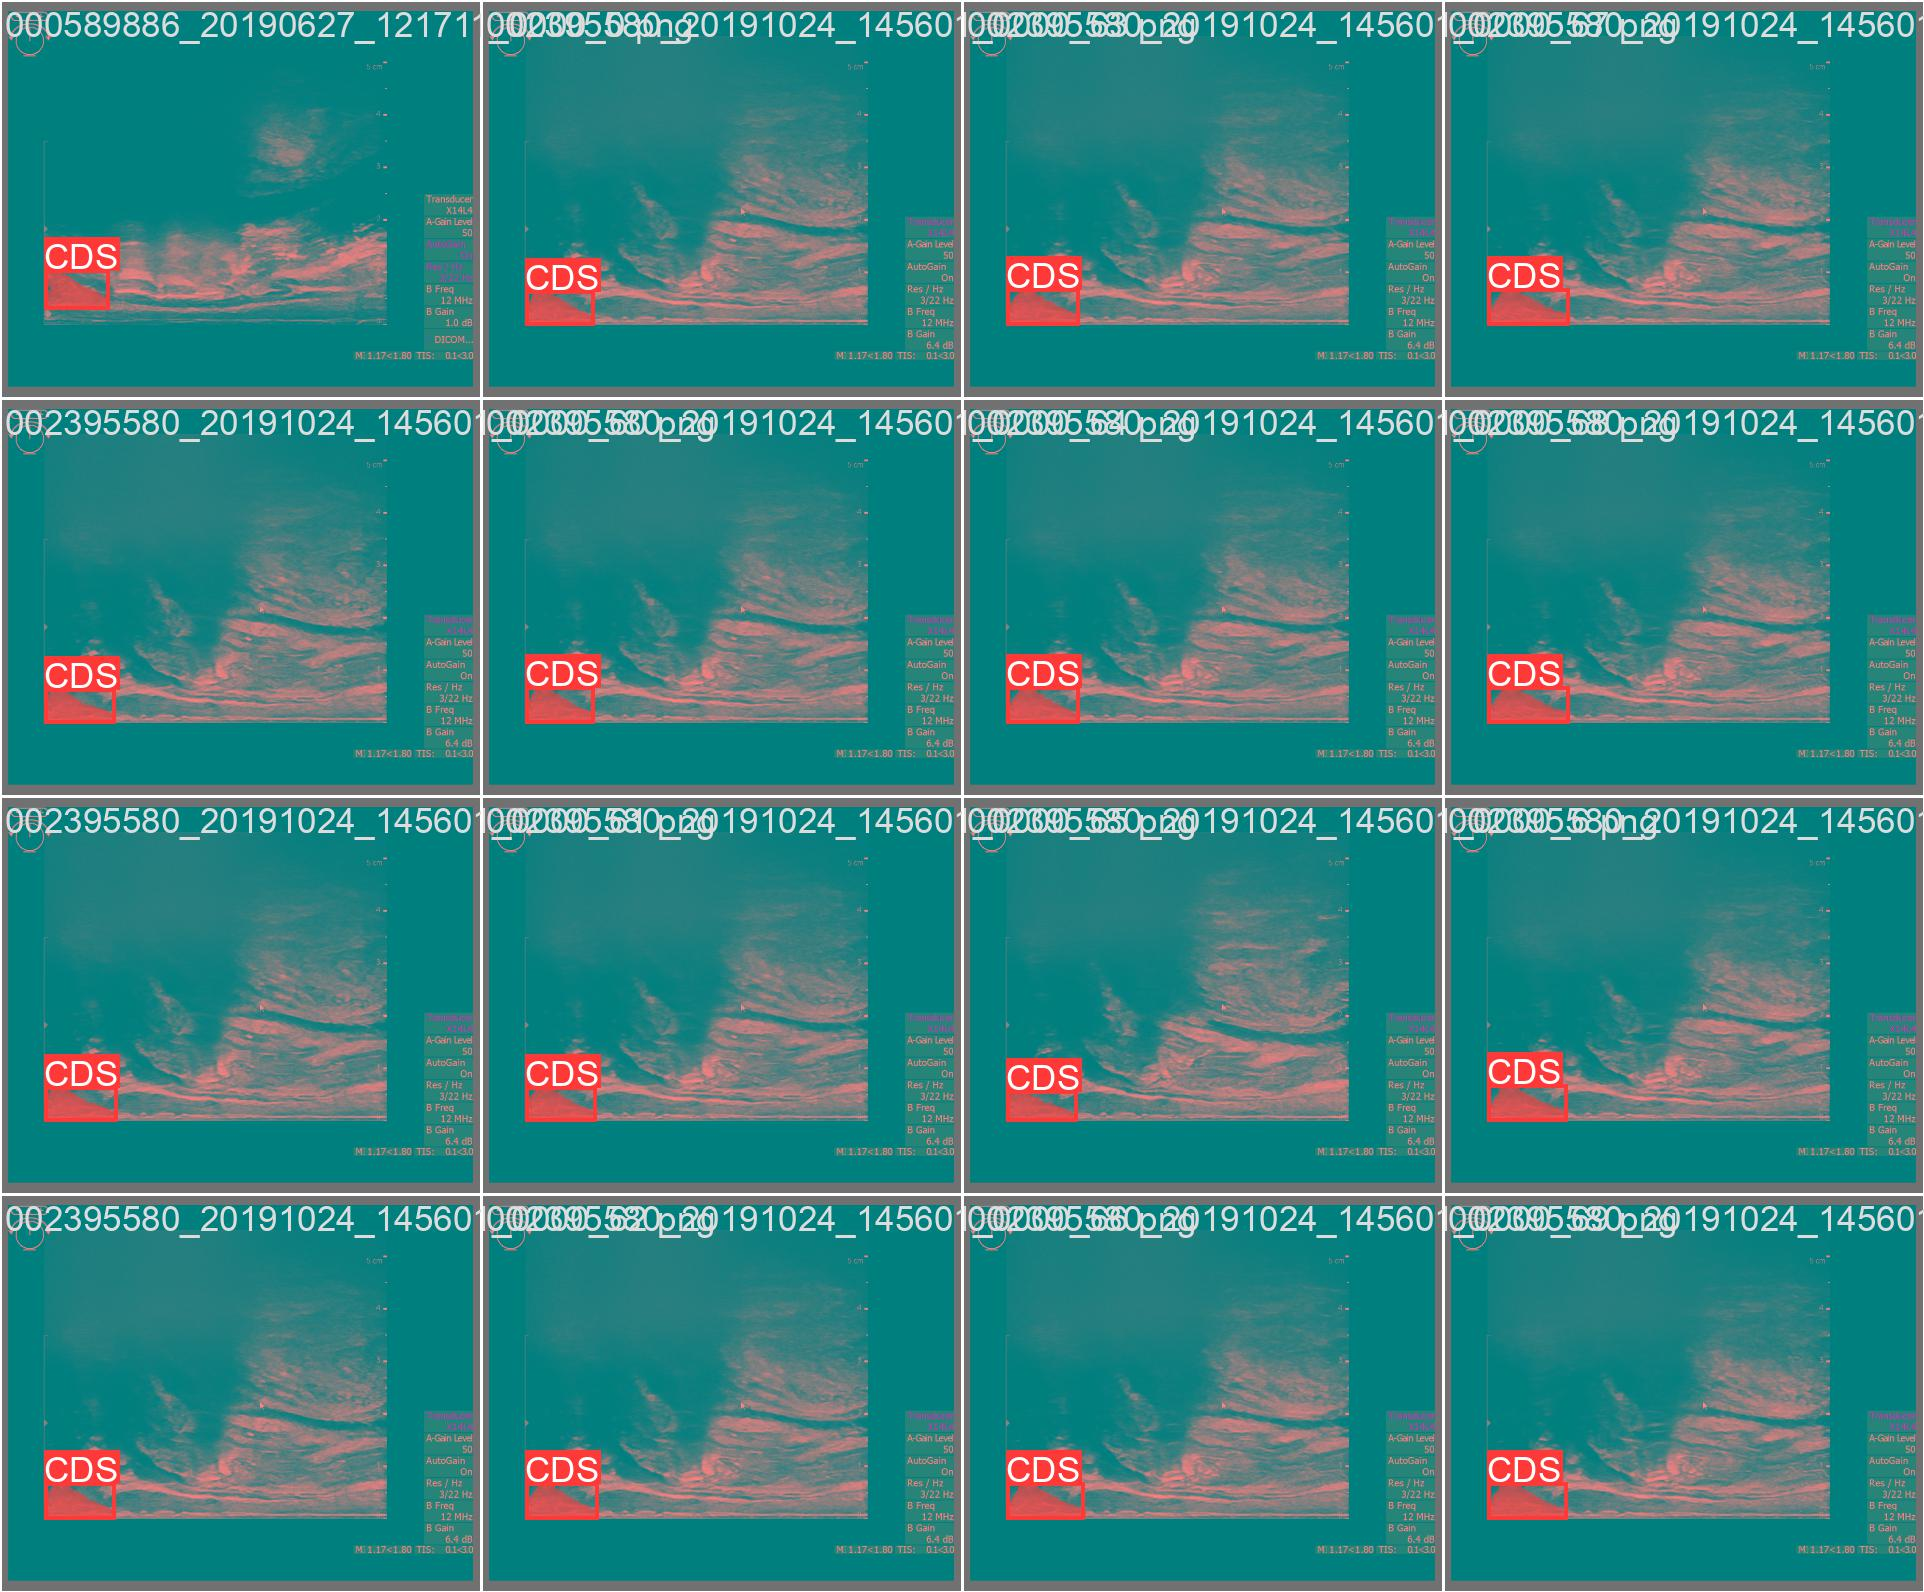

In [ ]:
from IPython.display import Image as show_image
show_image(filename="runs/segment/train/val_batch0_labels.jpg")

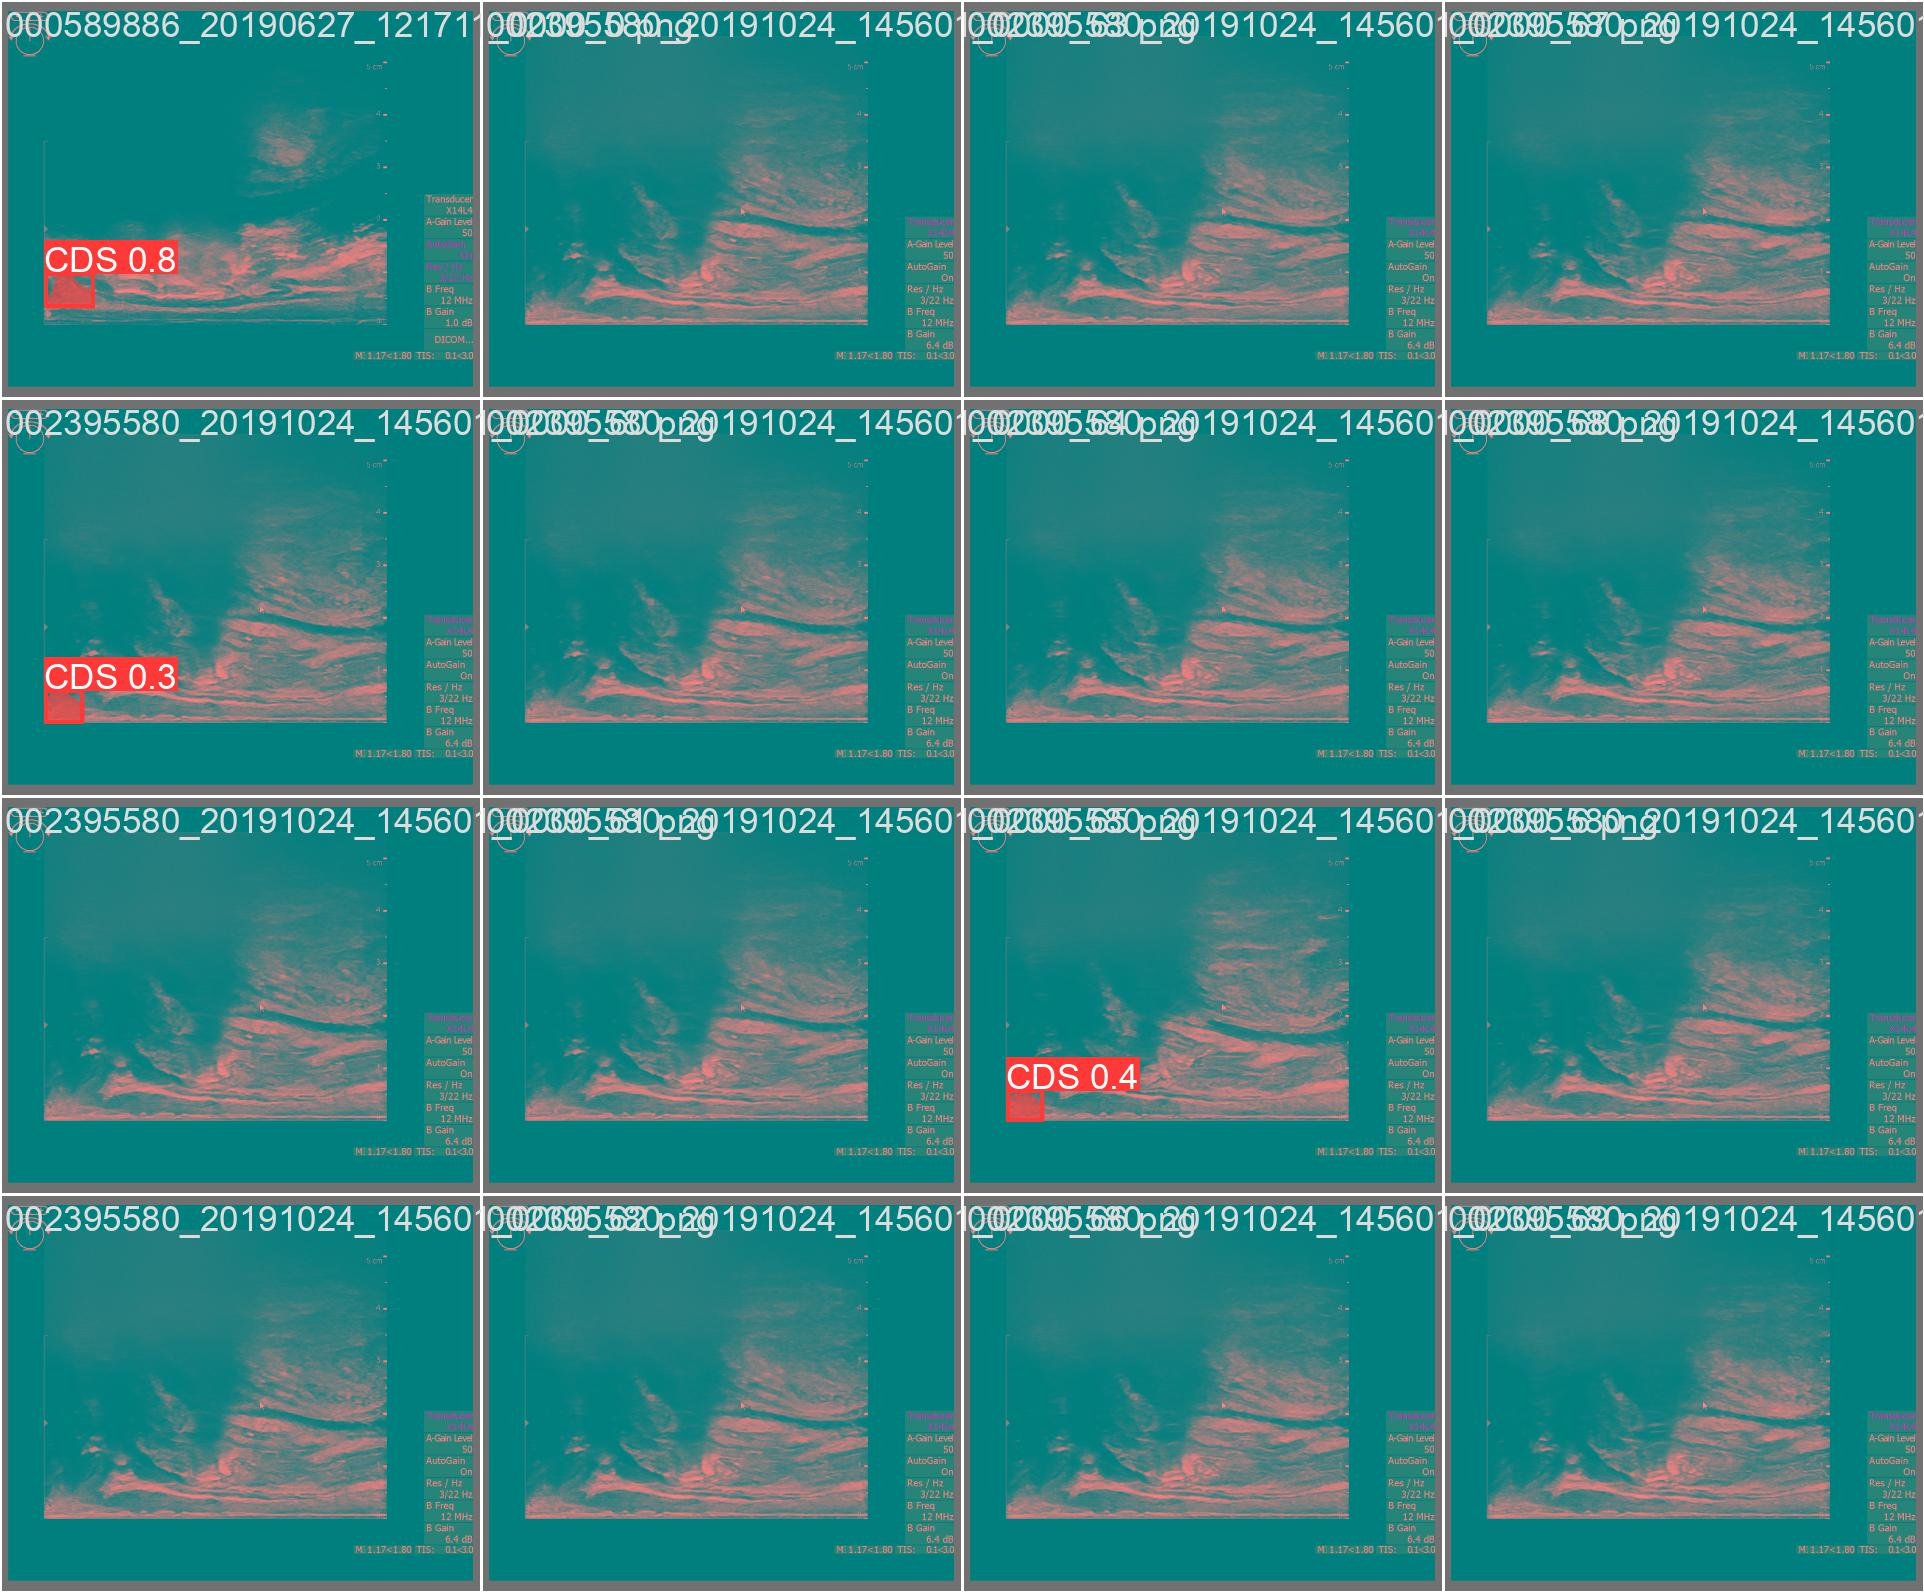

In [ ]:
show_image(filename="runs/segment/train/val_batch0_pred.jpg")

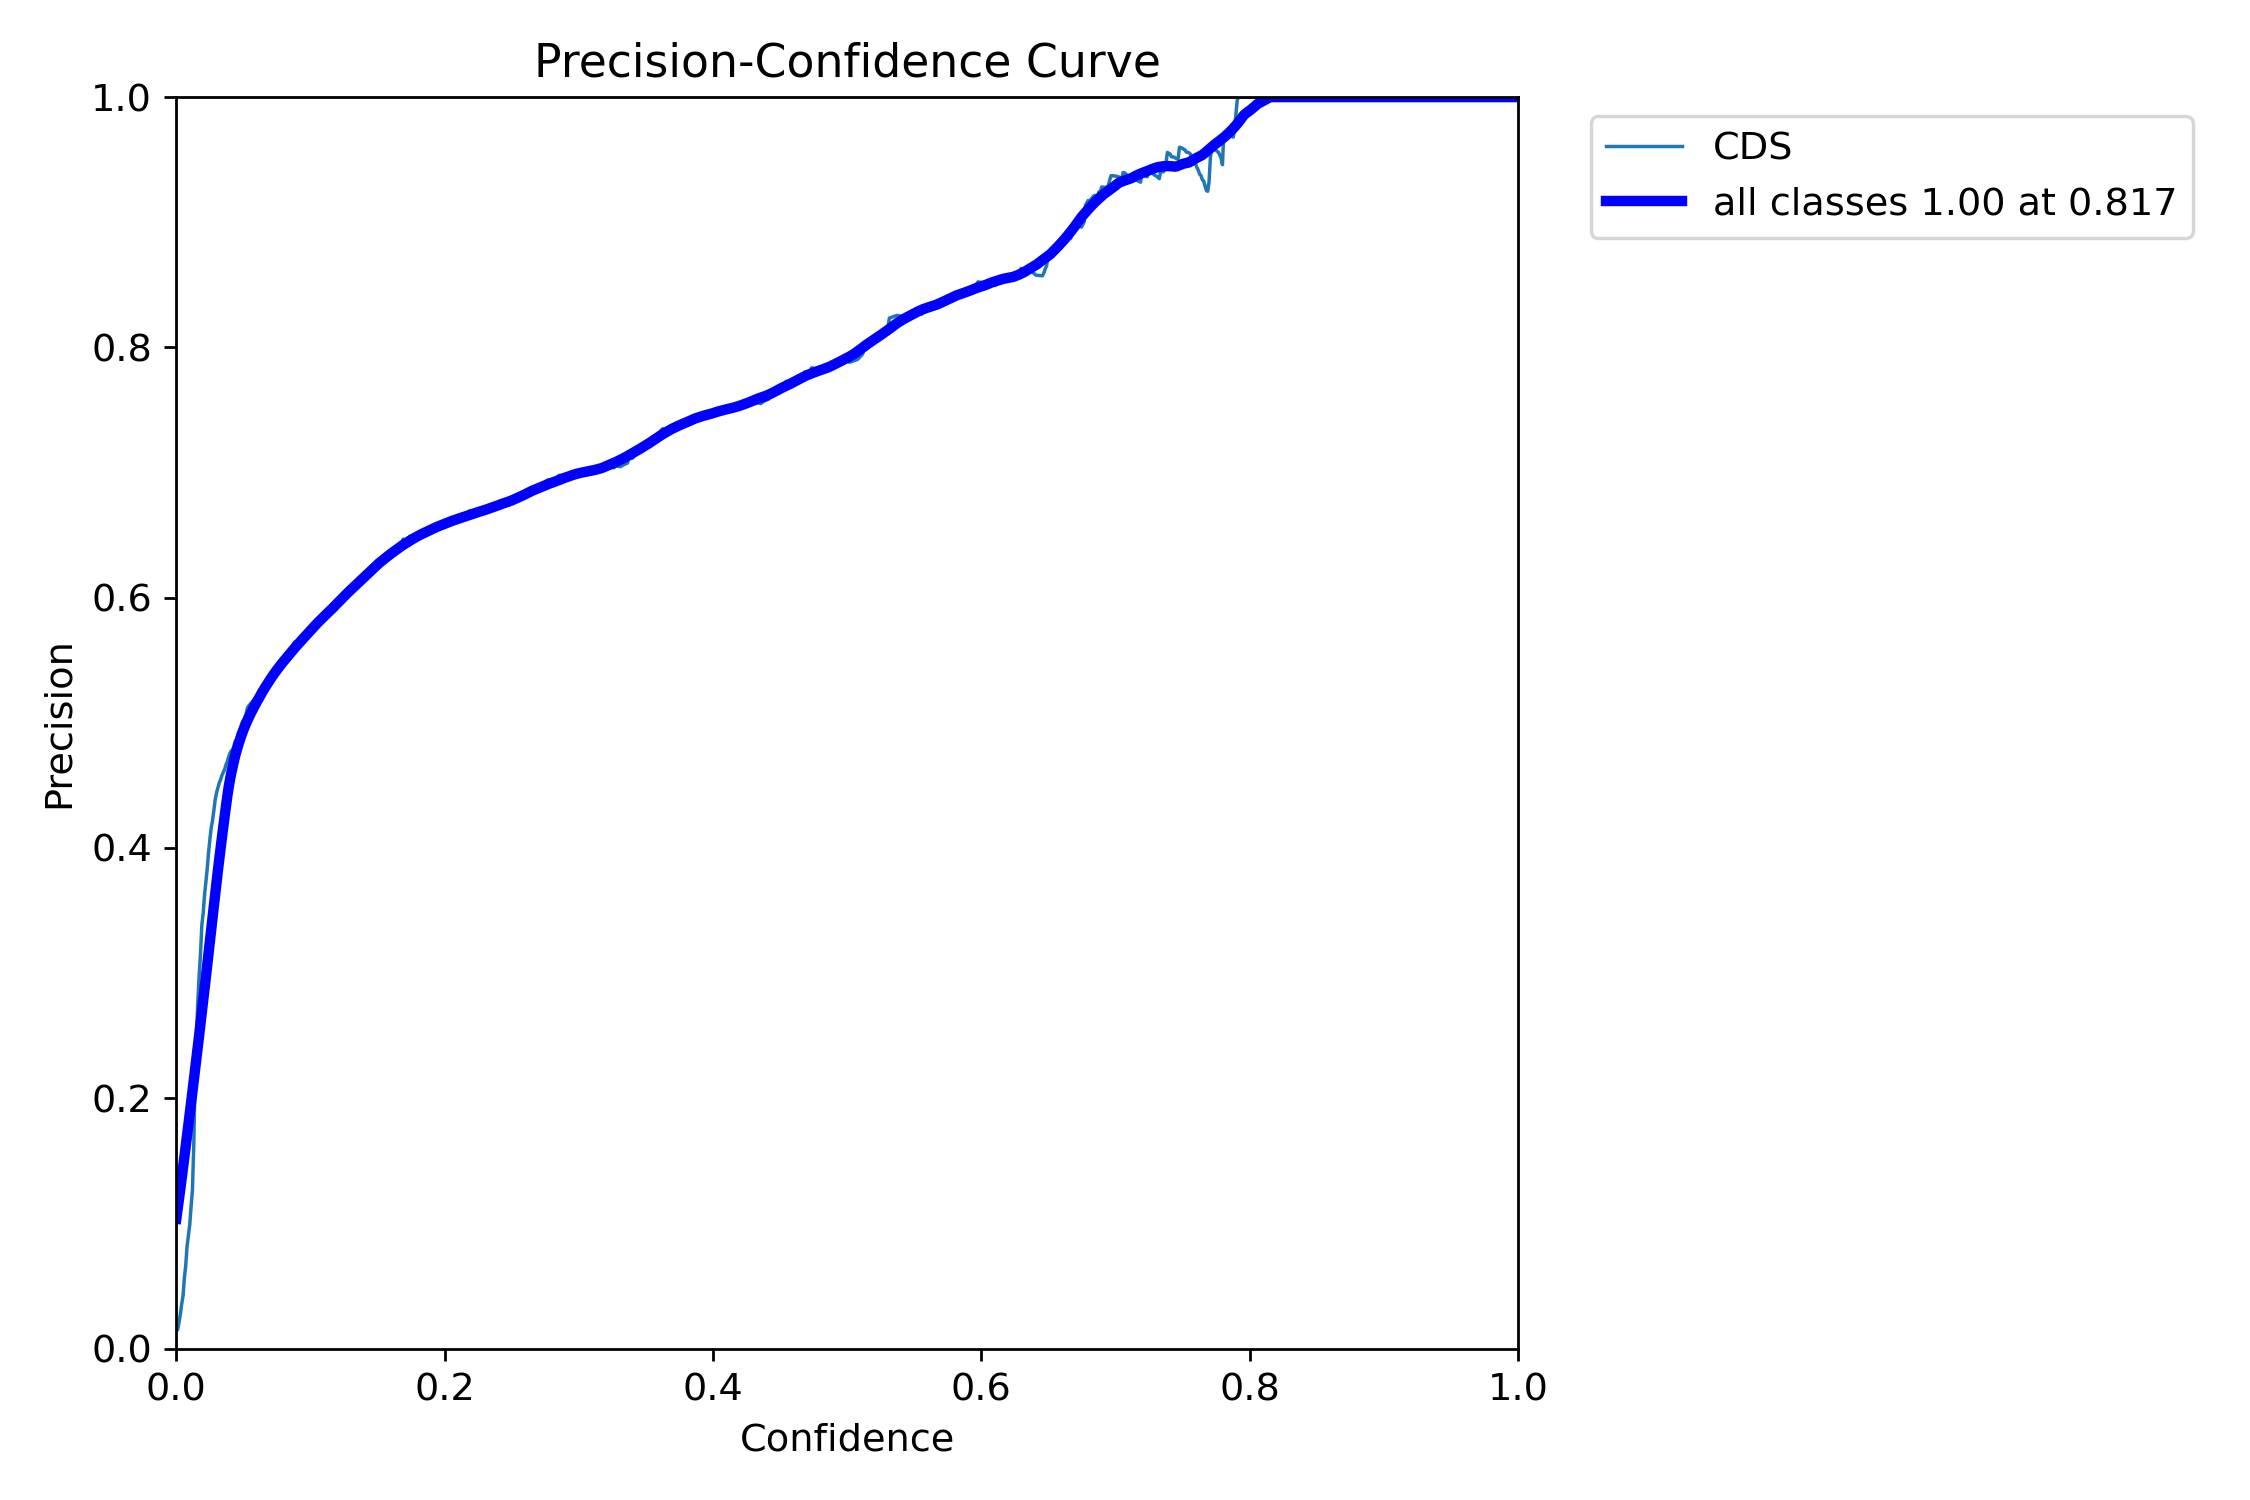

In [ ]:
show_image(filename="runs/segment/train/MaskP_curve.png")

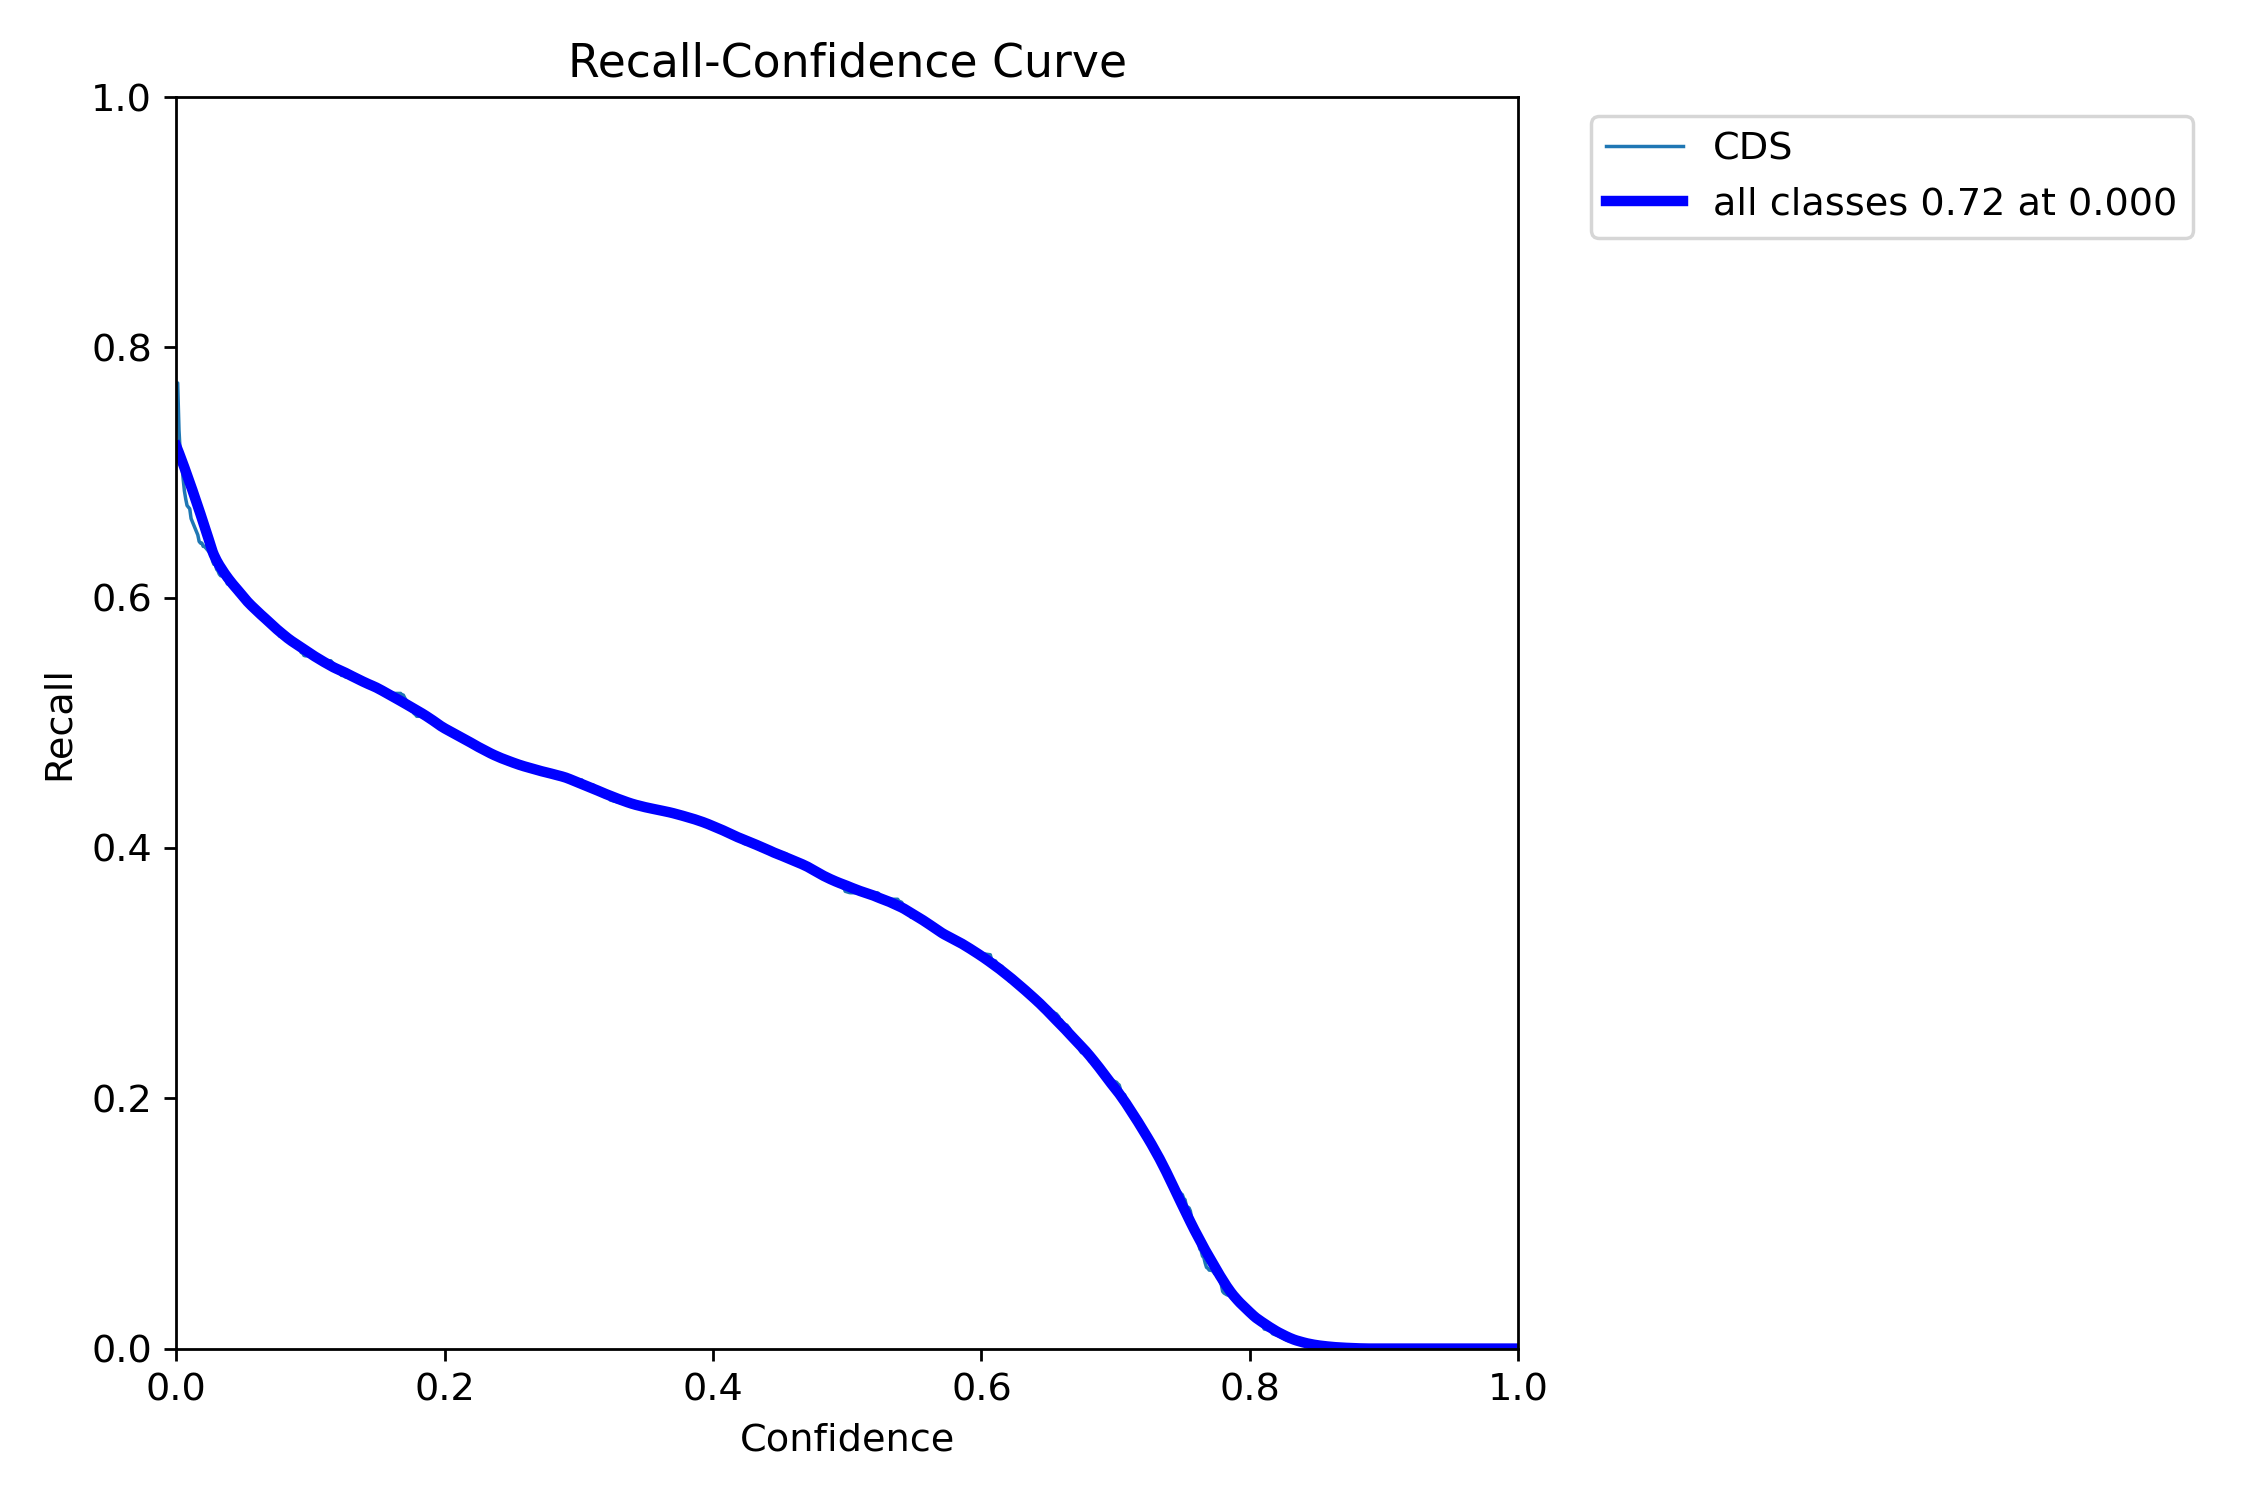

In [ ]:
show_image(filename="runs/segment/train/MaskR_curve.png")

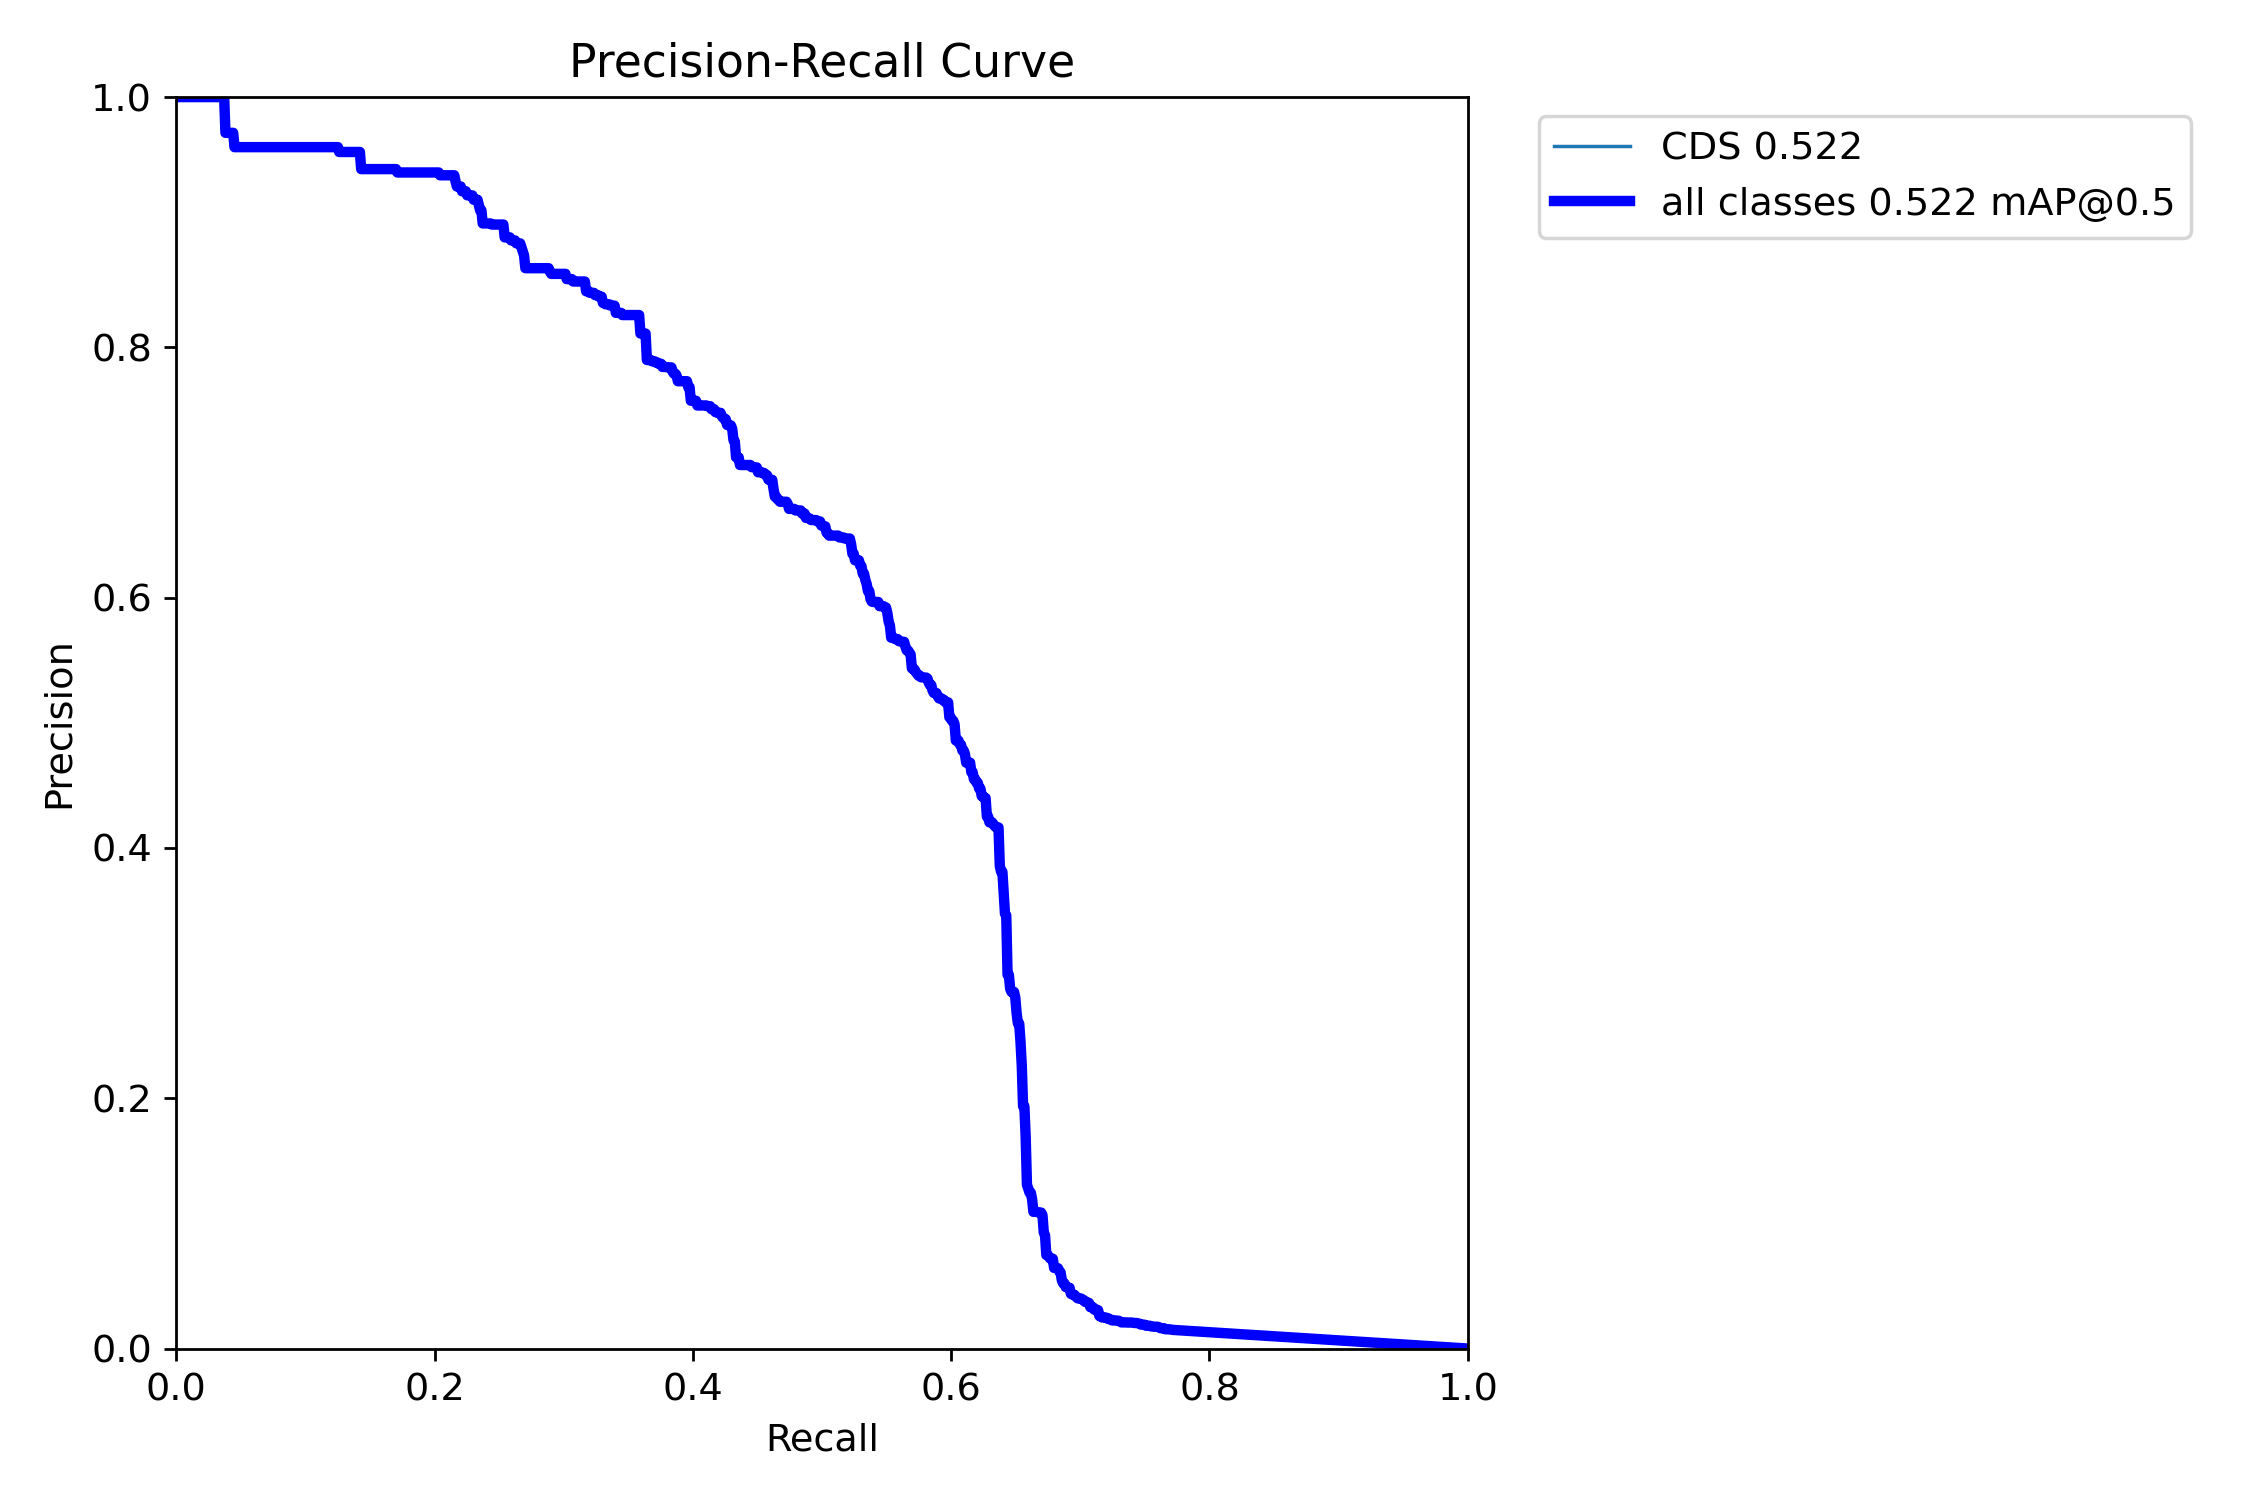

In [ ]:
show_image(filename="runs/segment/train/MaskPR_curve.png")

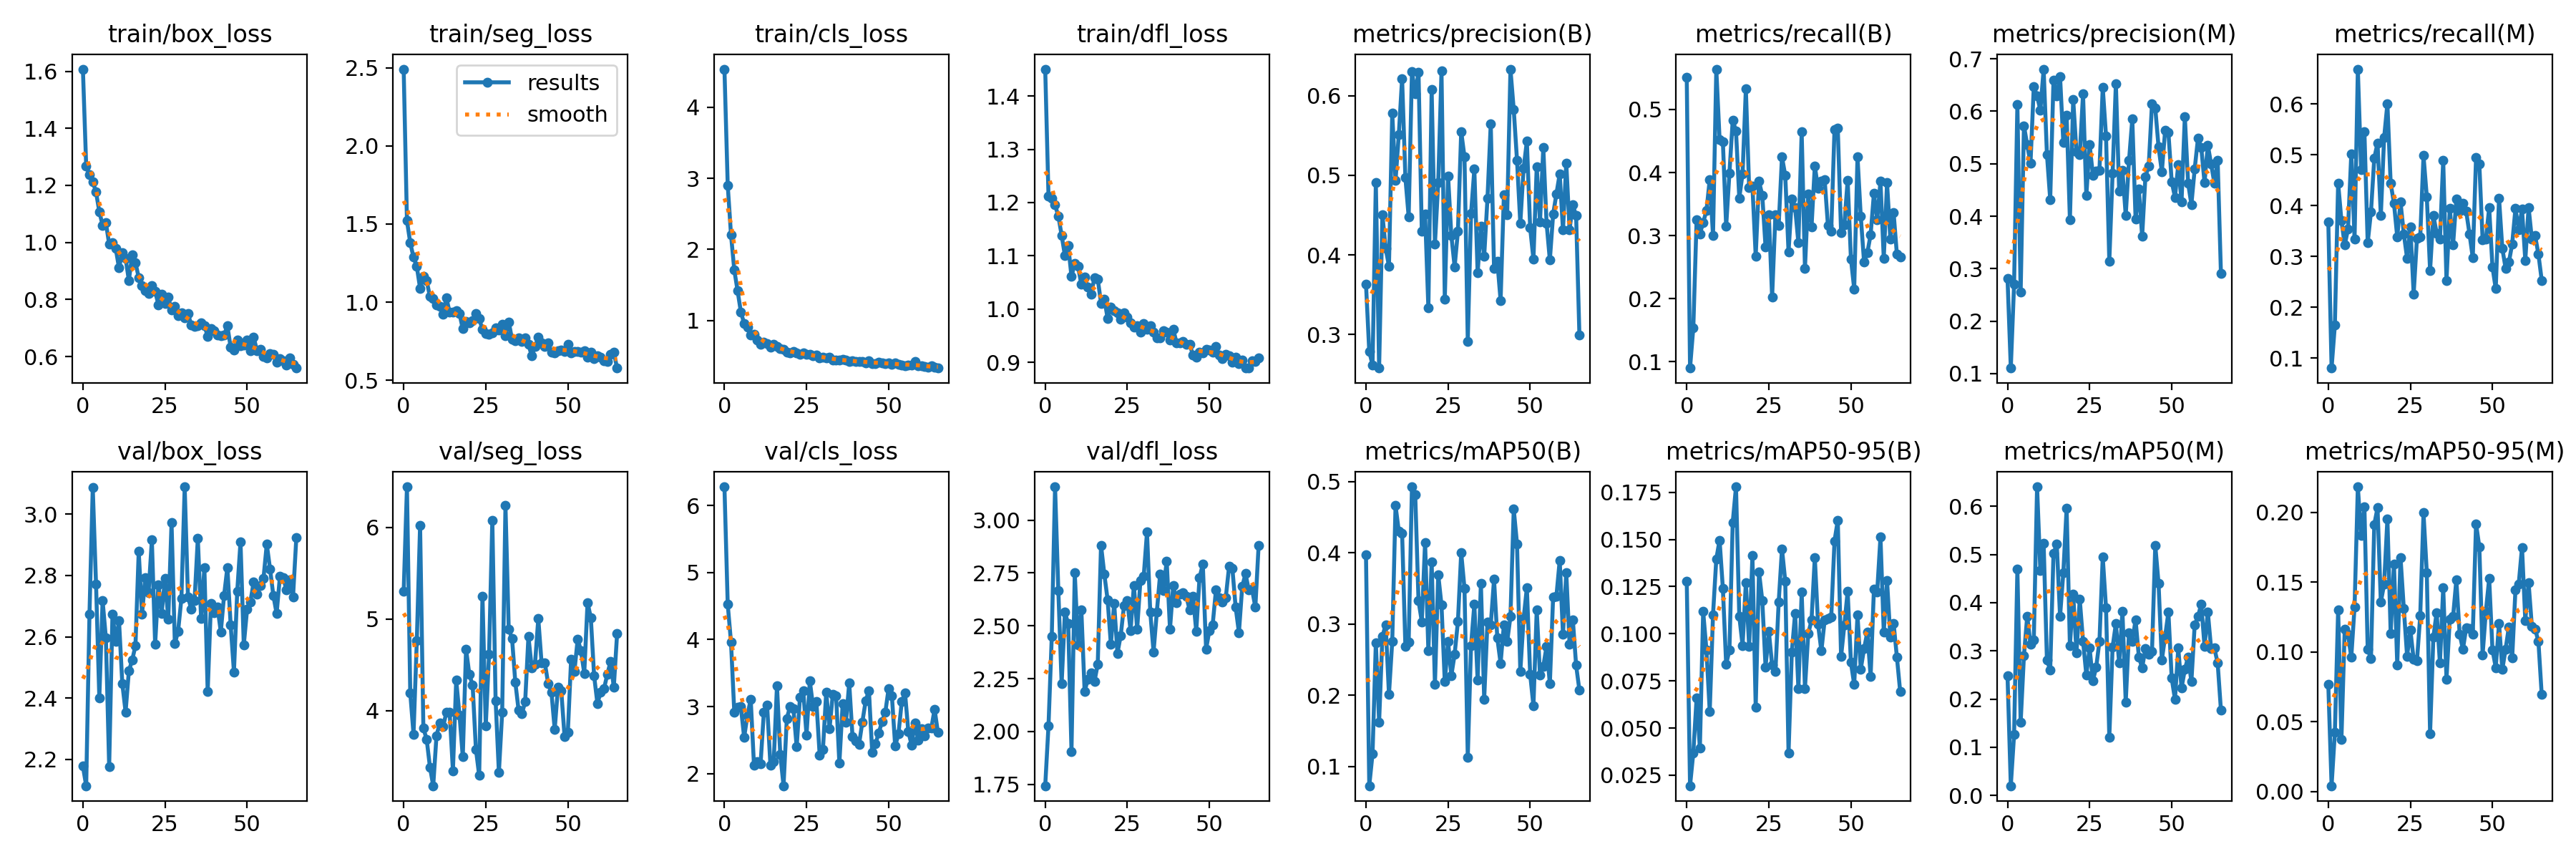

In [ ]:
show_image(filename="runs/segment/train/results.png")

In [ ]:
my_model = YOLO('runs/segment/train/weights/best.pt')
results = list(my_model('/content/drive/MyDrive/Rectum project/Yolo_Data/test/images/001412915_20210709_122910_0000_105.png', conf=0.128))
result = results[0]


image 1/1 /content/drive/MyDrive/Rectum project/Yolo_Data/test/images/001412915_20210709_122910_0000_105.png: 736x896 1 CDS, 69.6ms
Speed: 4.7ms preprocess, 69.6ms inference, 11.6ms postprocess per image at shape (1, 3, 736, 896)


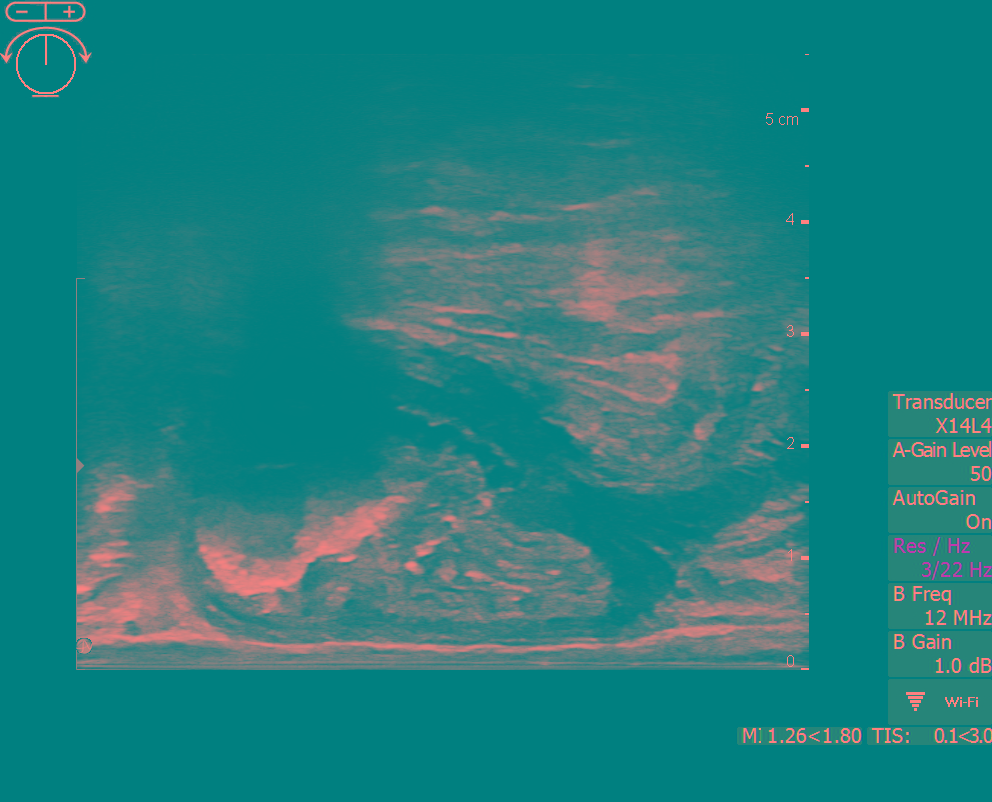

In [ ]:
image = Image.open('/content/drive/MyDrive/Rectum project/Yolo_Data/test/images/001412915_20210709_122910_0000_105.png')
image

WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.


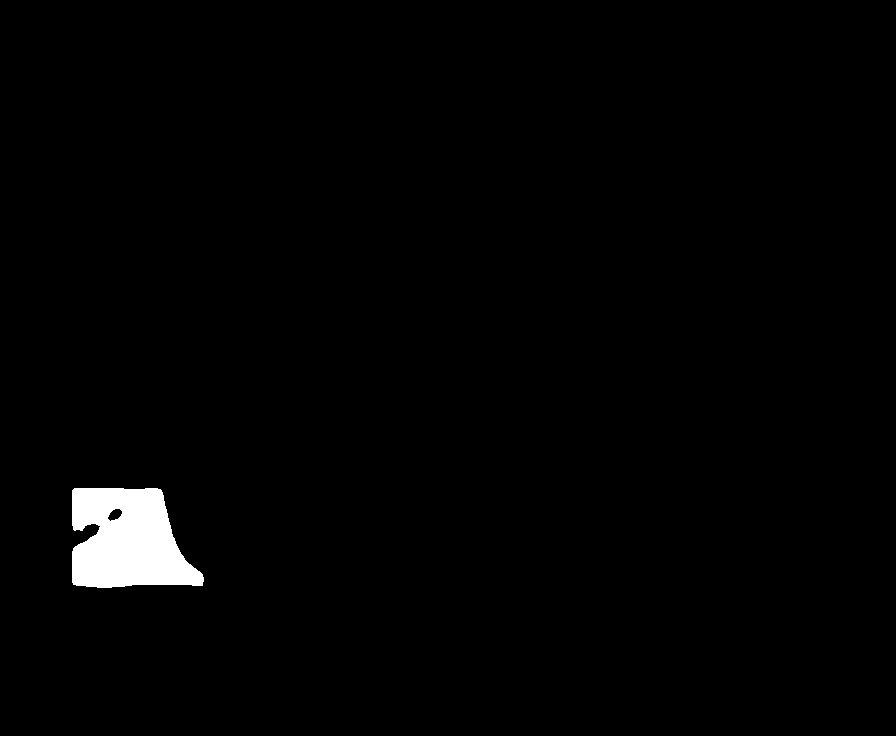

In [ ]:
import torchvision.transforms as T
T.ToPILImage()(result.masks.masks).show()

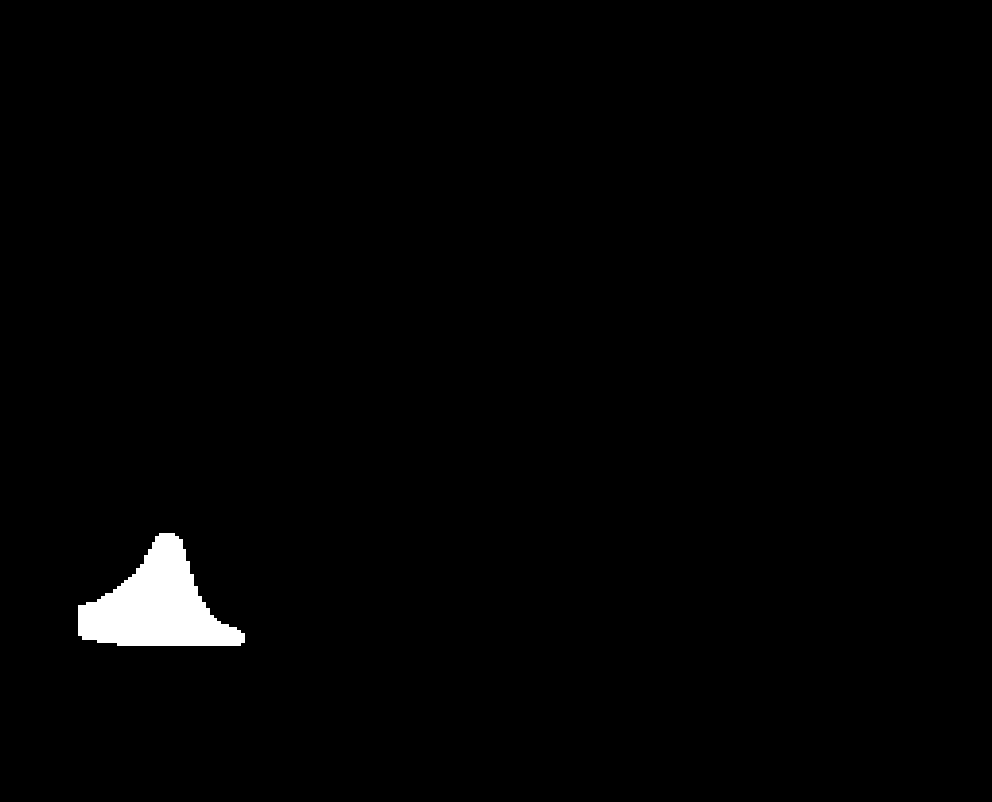

In [ ]:
i = '/content/drive/MyDrive/Rectum project//Data/001412915_20210709_122910_0000'
B, header =nrrd.read(path+'Data/' +i.split('/')[-1]+'/'+ i.split('/')[-1] + '_PRED.seg.nrrd')
frame = B[:,:,105]
frame = np.transpose(frame)
frame_n = (np.where(frame <3 , 0, frame)*(255/3)).astype('uint8')
im = Image.fromarray(frame_n)
im